In [2]:
!pip install -q transformers

!pip install -q datasets

!pip install -q evaluate

!pip install -q accelerate

!pip install -q gluonts ujson

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv("ASOS_Daily_2000_2004.csv")
# df2 = pd.read_csv("ASOS_Daily_2005_2010.csv")
# df = pd.concat([df, df2], axis = 0)
df.reset_index(inplace = True)
df = df[["tm", "avgTa", "maxTa", "sumRn", "avgWs", "avgRhm"]]
df["tm"] = pd.to_datetime(df["tm"], format = "%Y-%m-%d")
df.fillna(0, inplace = True)
# index to datetime index

# the data is not complete
# features of data is str format
# so we have to change the data type
# first, we need to fill the missing data
df = df.applymap(lambda x: 0 if x == "" else x)
df = df.astype({"avgTa": np.float32, "maxTa": np.float32, "sumRn": np.float32, "avgWs": np.float32, "avgRhm": np.float32})

df

ModuleNotFoundError: No module named 'seaborn'

In [109]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.pandas import PandasDataset

# we need to change the data type to PandasDataset
# PandasDataset is a class of gluonts
prediction_length = 365
context_length = 365
dyn_train = df[["avgTa", "maxTa", "avgWs", "avgRhm"]].to_numpy().T[:, :-prediction_length*2]
dyn_test = df[["avgTa", "maxTa", "avgWs", "avgRhm"]].to_numpy().T
dyn_val = df[["avgTa", "maxTa", "avgWs", "avgRhm"]].to_numpy().T[:, :-prediction_length]
target = df["sumRn"].to_numpy()[:-prediction_length*2].reshape(1, -1)
test_target = df["sumRn"].to_numpy()[:-prediction_length*2].reshape(1, -1)
validation_target = df["sumRn"].to_numpy()[:-prediction_length].reshape(1, -1)
# train_df = pd.DataFrame(data={"start": pd.Period(df["tm"][0], freq = "D"),"target":[target], "feat_static_cat" : 0 , "feat_dynamic_real": [dyn], "item_id": "T0"})
# test_df = pd.DataFrame(data={"start": pd.Period(df["tm"][0], freq = "D"),"target":[test_target], "feat_static_cat" : 0 , "feat_dynamic_real": [dyn], "item_id": "T0"})
# validation_df = pd.DataFrame(data={"start": pd.Period(df["tm"][0], freq = "D"),"target":[validation_target], "feat_static_cat" : 0 , "feat_dynamic_real": [dyn], "item_id": "T0"})


,start,target,feat_static_cat,feat_dynamic_real,item_id
0,2000-01-01,"[[0.0, 6.0, 0.0, 0.0, 18.4, 9.8, 0.0, 0.5, 0.0...",0,0,T0


In [93]:
# train_dict = {"start": pd.Period(df["tm"][0], freq = "D"),"target":target, "feat_static_cat" : 0 , "feat_dynamic_real": dyn_train, "item_id": "T0"}
# test_dict = {"start": pd.Period(df["tm"][0], freq = "D"),"target":test_target, "feat_static_cat" : 0 , "feat_dynamic_real": dyn_test, "item_id": "T0"}
# validation_dict = {"start": pd.Period(df["tm"][0], freq = "D"),"target":validation_target, "feat_static_cat" : 0 , "feat_dynamic_real": dyn_val, "item_id": "T0"}


(4, 3288)

In [41]:
from datasets import load_dataset

dataset = load_dataset("monash_tsf", "temperature_rain")

Found cached dataset monash_tsf (C:/Users/hj/.cache/huggingface/datasets/monash_tsf/temperature_rain/1.0.0/fc869f3ae1577c9def2a919ab1dd0c3d4a7a44826b8e0e8fa423bb0161b629e2)
100%|██████████| 3/3 [00:00<00:00,  3.27it/s]


In [116]:
# def create_dataset(num_series, num_steps, period=24, mu=1, sigma=0.3):
#     # create target: noise + pattern
#     # noise
#     noise = np.random.normal(mu, sigma, size=(num_series, num_steps))

#     # pattern - sinusoid with different phase
#     sin_minusPi_Pi = np.sin(
#         np.tile(np.linspace(-np.pi, np.pi, period), int(num_steps / period))
#     )
#     sin_Zero_2Pi = np.sin(
#         np.tile(np.linspace(0, 2 * np.pi, 24), int(num_steps / period))
#     )

#     pattern = np.concatenate(
#         (
#             np.tile(sin_minusPi_Pi.reshape(1, -1), (int(np.ceil(num_series / 2)), 1)),
#             np.tile(sin_Zero_2Pi.reshape(1, -1), (int(np.floor(num_series / 2)), 1)),
#         ),
#         axis=0,
#     )

#     target = noise + pattern

#     # create time features: use target one period earlier, append with zeros
#     feat_dynamic_real = np.concatenate(
#         (np.zeros((num_series, period)), target[:, :-period]), axis=1
#     )

#     # create categorical static feats: use the sinusoid type as a categorical feature
#     feat_static_cat = np.concatenate(
#         (
#             np.zeros(int(np.ceil(num_series / 2))),
#             np.ones(int(np.floor(num_series / 2))),
#         ),
#         axis=0,
#     )

#     return target, feat_dynamic_real, feat_static_cat

# # define the parameters of the dataset
# custom_ds_metadata = {
#     "num_series": 100,
#     "num_steps": 24 * 7,
#     "prediction_length": 24,
#     "freq": "1H",
#     "start": [pd.Period("01-01-2019", freq="1H") for _ in range(100)],
# }

# data_out = create_dataset(
#     custom_ds_metadata["num_series"],
#     custom_ds_metadata["num_steps"],
#     custom_ds_metadata["prediction_length"],
# )

# target, feat_dynamic_real, feat_static_cat = data_out

from gluonts.dataset.field_names import FieldName
from datetime import datetime



AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [46]:
np.array(dataset["train"][0]["feat_dynamic_real"]).shape, np.array(dataset["train"][0]["target"]).shape

((4, 665), (72, 665))

In [3]:
train_example = dataset['train'][0]
validation_example = dataset['validation'][0]


freq = "1M"
prediction_length = 24

assert len(train_example["target"]) + prediction_length == len(
    validation_example["target"]
)

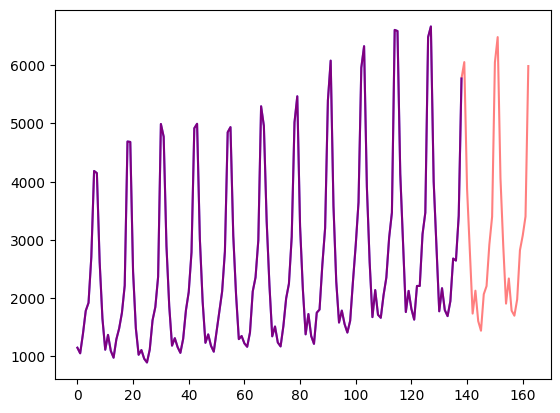

In [4]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
axes.plot(train_example["target"], color="blue")
axes.plot(validation_example["target"], color="red", alpha=0.5)

plt.show()

In [5]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [6]:
from functools import lru_cache

import pandas as pd
import numpy as np

@lru_cache(10_000)
def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)

def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch


In [7]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))

In [8]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)

In [9]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)

In [11]:
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

config = TimeSeriesTransformerConfig(
    prediction_length=prediction_length,
    # context length:
    context_length=prediction_length * 2,
    # lags coming from helper given the freq:
    lags_sequence=lags_sequence,
    # we'll add 2 time features ("month of year" and "age", see further):
    num_time_features=len(time_features) + 1,
    # we have a single static categorical feature, namely time series ID:
    num_static_categorical_features=1,
    # it has 366 possible values:
    cardinality=[len(train_dataset)],
    # the model will learn an embedding of size 2 for each of the 366 possible values:
    embedding_dimension=[2],
    
    # transformer params:
    encoder_layers=4,
    decoder_layers=4,
    d_model=32,
)

model = TimeSeriesTransformerForPrediction(config)


In [12]:
from gluonts.time_feature import (
    time_features_from_frequency_str,
    TimeFeature,
    get_lags_for_frequency,
)
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)

In [13]:
from transformers import PretrainedConfig

def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    # a bit like torchvision.transforms.Compose
    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # month of year in the case when freq="M"
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in its life the value of the time series is,
            # sort of a running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )


In [14]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional

def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )

In [15]:
from typing import Iterable

import torch
from gluonts.itertools import Cached, Cyclic
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from the 366 possible transformed time series)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(
        stream, is_train=True
    )
    
    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )


In [16]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # we create a Test Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "test")

    # we apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)
    
    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [17]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=train_dataset,
    batch_size=256,
    num_batches_per_epoch=100,
)

test_dataloader = create_test_dataloader(
    config=config,
    freq=freq,
    data=test_dataset,
    batch_size=64,
)


In [22]:
batch = next(iter(train_dataloader))
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)

In [25]:
from accelerate import Accelerator
from torch.optim import AdamW

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-1)

model, optimizer, train_dataloader = accelerator.prepare(
    model,
    optimizer,
    train_dataloader,
)

model.train()
for epoch in range(10):
    for idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(
            static_categorical_features=batch["static_categorical_features"].to(device)
            if config.num_static_categorical_features > 0
            else None,
            static_real_features=batch["static_real_features"].to(device)
            if config.num_static_real_features > 0
            else None,
            past_time_features=batch["past_time_features"].to(device),
            past_values=batch["past_values"].to(device),
            future_time_features=batch["future_time_features"].to(device),
            future_values=batch["future_values"].to(device),
            past_observed_mask=batch["past_observed_mask"].to(device),
            future_observed_mask=batch["future_observed_mask"].to(device),
        )
        loss = outputs.loss

        # Backpropagation
        accelerator.backward(loss)
        optimizer.step()

        if idx % 100 == 0:
            print(loss.item())


9.200352668762207
7.51251745223999
7.842845916748047
7.634547710418701
7.293076038360596
7.560882091522217
6.854263782501221
6.8373870849609375
7.258347034454346
7.324484348297119


In [26]:
model.eval()

forecasts = []

for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts.append(outputs.sequences.cpu().numpy())


In [31]:
forecasts[0].shape

(64, 100, 24)

In [33]:
forecasts = np.vstack(forecasts)
print(forecasts.shape)



(366, 100, 24)


In [34]:
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

forecast_median = np.median(forecasts, 1)

mase_metrics = []
smape_metrics = []
for item_id, ts in enumerate(test_dataset):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id], 
        references=np.array(ground_truth), 
        training=np.array(training_data), 
        periodicity=get_seasonality(freq))
    mase_metrics.append(mase["mase"])
    
    smape = smape_metric.compute(
        predictions=forecast_median[item_id], 
        references=np.array(ground_truth), 
    )
    smape_metrics.append(smape["smape"])


In [35]:
print(f"MASE: {np.mean(mase_metrics)}")
print(f"sMAPE: {np.mean(smape_metrics)}")



MASE: 1.3784297754611865
sMAPE: 0.17411477292589103


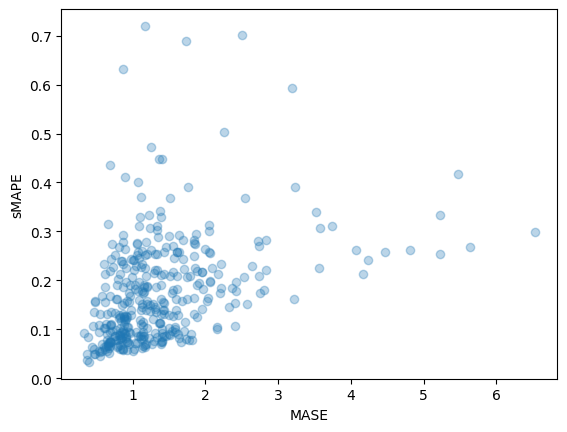

In [36]:
plt.scatter(mase_metrics, smape_metrics, alpha=0.3)
plt.xlabel("MASE")
plt.ylabel("sMAPE")
plt.show()


In [39]:
len(mase_metrics)

366

In [37]:
import matplotlib.dates as mdates

def plot(ts_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=test_dataset[ts_index][FieldName.START],
        periods=len(test_dataset[ts_index][FieldName.TARGET]),
        freq=freq,
    ).to_timestamp()

    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

    ax.plot(
        index[-2*prediction_length:], 
        test_dataset[ts_index]["target"][-2*prediction_length:],
        label="actual",
    )

    plt.plot(
        index[-prediction_length:], 
        np.median(forecasts[ts_index], axis=0),
        label="median",
    )
    
    plt.fill_between(
        index[-prediction_length:],
        forecasts[ts_index].mean(0) - forecasts[ts_index].std(axis=0), 
        forecasts[ts_index].mean(0) + forecasts[ts_index].std(axis=0), 
        alpha=0.3, 
        interpolate=True,
        label="+/- 1-std",
    )
    plt.legend()
    plt.show()


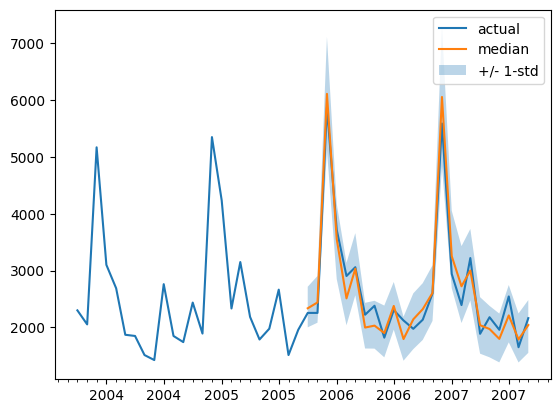

In [38]:
plot(334)

In [35]:
from gluonts.dataset.common import ListDataset
from gluonts.mx.model.transformer import TransformerEstimator
from gluonts.mx.trainer import Trainer
import pandas as pd
from datetime import datetime


# your data.csv is supposed to have columns 'Year', 'Month', 'Rainfall - (MM)'
df = pd.read_csv("ASOS_Daily_2000_2004.csv")

df = df[["tm", "avgTa", "maxTa", "sumRn", "avgWs", "avgRhm"]]
df["tm"] = pd.to_datetime(df["tm"], format = "%Y-%m-%d")
df.fillna(0, inplace = True)
# index to datetime index

# the data is not complete
# features of data is str format
# so we have to change the data type
# first, we need to fill the missing data
df = df.applymap(lambda x: 0 if x == "" else x)
df = df.astype({"avgTa": np.float32, "maxTa": np.float32, "sumRn": np.float32, "avgWs": np.float32, "avgRhm": np.float32})


# define the parameters
prediction_length = 60
context_length = 360

# data["tm"] = pd.date_range(start="1901-01-01", periods=len(data), freq="M")

# create ListDataset
training_data = ListDataset(
    [{"start": df.tm[0], "target": df["sumRn"][:-prediction_length].values}],
    freq = "D"
)

# create and train Transformer estimator
estimator = TransformerEstimator(
    freq="D", 
    prediction_length=prediction_length,
    context_length=context_length,
    trainer=Trainer(epochs=3)
)

predictor = estimator.train(training_data=training_data)

# create testing_data (for forecasting)
testing_data = ListDataset(
    [{"start": df.tm[0], "target": df["sumRn"].values}],
    freq = "D"
)

# perform forecasting
for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
    print(forecast)


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:35<00:00,  1.40it/s, epoch=3/3, avg_epoch_loss=1.99]


gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[-0.22924635, -0.0501061 , -0.2757568 , ..., -1.2244513 ,
         0.12391552, -0.02676091],
       [-0.5548528 , -1.0847145 , -0.41752818, ...,  0.04432787,
        -0.1746893 ,  0.02070371],
       [-0.22433798,  0.27023512,  0.15346861, ...,  0.00681869,
        -0.29012457,  0.32813218],
       ...,
       [ 0.28075102, -0.19755958, -0.09366444, ..., -0.4576109 ,
        -1.2346597 ,  0.9090113 ],
       [ 0.5634659 , -0.28376815, -0.17850496, ..., -0.34935194,
        -0.08388647,  0.05302099],
       [ 2.3569095 , -0.34318763,  0.02459939, ..., -0.16391529,
        -0.6909627 , -0.19495368]], dtype=float32), start_date=Period('2005-01-01', 'D'))


In [30]:
forecast

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[ 0.16195977,  0.21157932, -0.09772977, ..., -0.4228955 ,
         0.11224598,  0.156866  ],
       [-0.06118947,  0.12883441, -0.00258635, ..., -0.2097945 ,
        -0.2293477 ,  0.725938  ],
       [ 0.01417793, -0.08176046,  0.02782121, ...,  0.3893363 ,
        -0.05327631,  0.87805945],
       ...,
       [-0.2099896 , -0.04977314,  0.2842051 , ...,  0.02773857,
         0.20134605, -0.08423295],
       [-0.07310112,  0.08658863, -0.20459788, ...,  0.29477698,
        -0.27531862, -0.14508843],
       [ 0.18280526,  0.09367043, -0.24696504, ...,  0.13806383,
        -0.17199992, -0.05167776]], dtype=float32), start_date=Period('2005-01-01', 'D'))

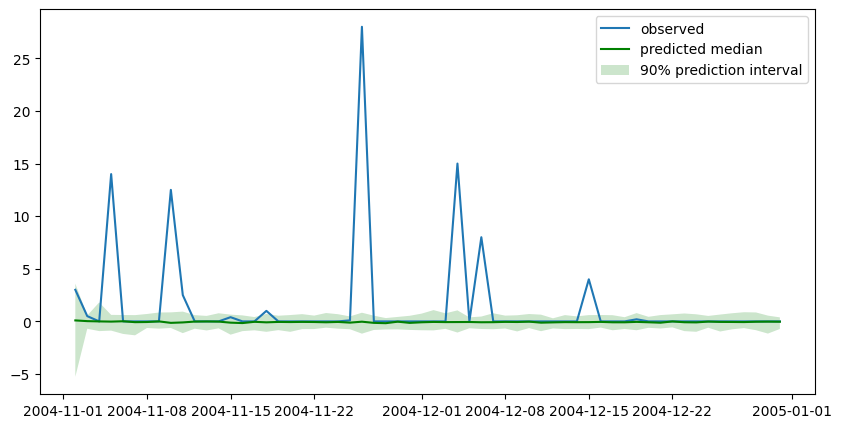

In [44]:
from gluonts.dataset.util import to_pandas
from gluonts.evaluation import Evaluator, make_evaluation_predictions
import numpy as np
import matplotlib.pyplot as plt
forecast_it, ts_it = make_evaluation_predictions(dataset=testing_data, predictor=predictor)
forecasts = list(forecast_it)
tests = list(ts_it)
N = 100
n_plot = 2
indices = np.random.choice(np.arange(0, N), size=n_plot, replace=False)

plt.figure(figsize=(10, 5))
plt.plot(tests[0][-prediction_length :].to_timestamp())
forecasts[0].plot(intervals=(0.9,), color="g")
plt.legend(["observed", "predicted median", "90% prediction interval"])

In [54]:
forecasts[0].samples.mean(axis=0).shape, df["sumRn"].values[-prediction_length:].shape


# MSE, MAE, R2score using sklearn

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(df["sumRn"].values[-prediction_length:], forecasts[0].samples.mean(axis=0)),
mean_absolute_error(df["sumRn"].values[-prediction_length:], forecasts[0].samples.mean(axis=0)),
r2_score(df["sumRn"].values[-prediction_length:], forecasts[0].samples.mean(axis=0))


ModuleNotFoundError: No module named 'sklearn'

In [56]:
!pip install scikit-learn

^C


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5f/08/c66e99f06fb73f727c870172f0962c103262ac68839cc05234709b7b45c2/scikit_learn-1.3.0-cp38-cp38-win_amd64.whl.metadata
     --------------------------------------- 42.2/42.2 MB 74.9 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Using cached joblib-1.3.1-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 9.2/9.2 MB 76.3 kB/s eta 0:00:00
Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
Using cached thread

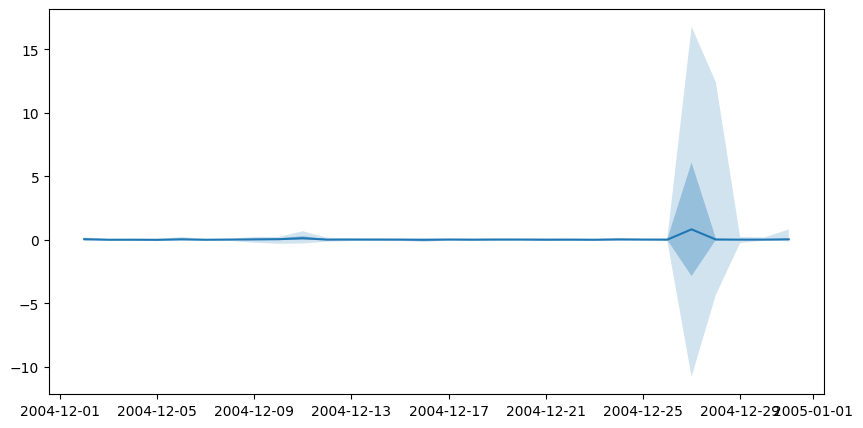

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 5))
np.array(forecasts).item().plot()

In [2]:
import gluonts.model.transformer as tfs

ModuleNotFoundError: No module named 'gluonts.model.transformer'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
# from gluonts.torch import DeepAREstimator
from gluonts.mx.model.transformer import TransformerEstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv("ASOS_Daily_2000_2004.csv")
df = df[["tm", "avgTa", "maxTa", "sumRn", "avgWs", "avgRhm"]]
# index to datetime index
df["tm"] = pd.to_datetime(df["tm"])
df.index = df["tm"]

# the data is not complete
# features of data is str format
# so we have to change the data type
# first, we need to fill the missing data
df = df.applymap(lambda x: 0 if x == "" else x)
df = df.astype({"avgTa": np.float32, "maxTa": np.float32, "sumRn": np.float32, "avgWs": np.float32, "avgRhm": np.float32})

dataset = PandasDataset(df, target="sumRn")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-60)
training_data, test_gen

test_data = test_gen.generate_instances(prediction_length=60, windows=3)

# # Train the model and make predictions
# model = TransformerEstimator(
#     prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
# ).train(training_data)

estimator = TransformerEstimator(
    freq="D", 
    prediction_length=60,
    context_length=180,
    trainer=Trainer(epochs=10)
)

# forecasts = list(model.predict(test_data.input))

# # Plot predictions
# plt.plot(df["1954":], color="black")
# for forecast in forecasts:
#   forecast.plot()
# plt.legend(["True values"], loc="upper left", fontsize="xx-large")

In [23]:
predictor = estimator.train(training_data=training_data)


100%|██████████| 50/50 [00:14<00:00,  3.55it/s, epoch=10/10, avg_epoch_loss=1.41]


In [24]:
# perform forecasting
for test_entry, forecast in zip(testing_data, predictor.predict(testing_data)):
    print(forecast)

gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=array([[-0.00380435,  0.02059971,  0.00435939, ..., -0.0049875 ,
         0.02656508, -0.025218  ],
       [ 0.00653877,  0.03714231,  0.04195713, ..., -0.03090084,
         0.08362745,  0.00303474],
       [ 0.00775528, -0.00358845, -0.00451961, ...,  0.01281632,
         0.01207093,  0.0281704 ],
       ...,
       [ 0.02240713,  0.0614692 , -0.00273167, ...,  0.00222372,
        -0.01212886,  0.0134027 ],
       [ 0.00760415,  0.03632982, -0.02436569, ..., -0.00938206,
        -0.0099723 ,  0.00801146],
       [ 0.01252886, -0.01183205,  0.01172781, ...,  0.01753841,
         0.02937539,  0.02487298]], dtype=float32), start_date=Period('2005-01-01', 'D'))


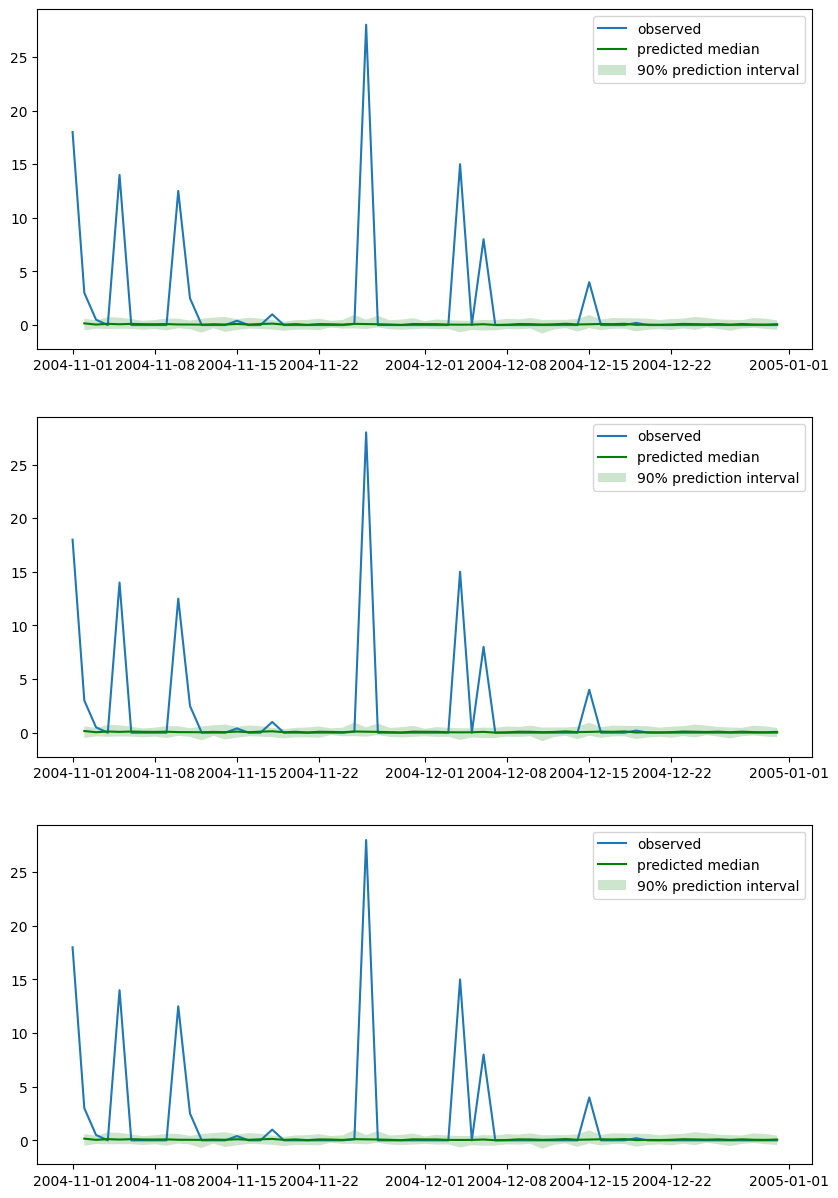

In [26]:
forecast_it, ts_it = make_evaluation_predictions(dataset=testing_data, predictor=predictor)
forecasts = list(forecast_it)
tests = list(ts_it)
N = 100
n_plot = 3
indices = np.random.choice(np.arange(0, N), size=n_plot, replace=False)
fig, axes = plt.subplots(n_plot, 1, figsize=(10, n_plot * 5))
for index, ax in zip(indices, axes):
    ax.plot(tests[0][-4 * prediction_length :].to_timestamp())
    plt.sca(ax)
    forecasts[0].plot(intervals=(0.9,), color="g")
    plt.legend(["observed", "predicted median", "90% prediction interval"])